...

Agora vamos alterar alguns pixels e salvar novamente a imagem

# Alterando a imagem

O desafio aqui é transformar a imagem de forma que ela não possua mais tons de verde

In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Para facilitar a exibicao das imagens, sera criada uma funcao para mostrar diretamente elas, de forma a omitir a complexidade dos parametros do matplotlib. Também será criada uma função para mostrar varias imagens juntas.

In [65]:
def mostrar(imagens: list, titulos=[], cmaps=[], eixos = False):
    if type(imagens) == list:
        if type(imagens[0]) == list:
            fig, axs = plt.subplots(len(imagens), len(imagens[0]), figsize=(5*len(imagens[0]), 5*len(imagens)))
            for i in range(len(imagens)):
                for j in range(len(imagens[i])):
                    imagem = imagens[i][j]
                    if cmaps[i][j]:
                        axs[i][j].imshow(imagem, cmap=cmaps[i][j])
                    else:
                        axs[i][j].imshow(imagem)
                    if titulos[i][j]:
                        axs[i][j].set_title(titulos[i][j])
                    if not eixos:
                        axs[i][j].axis("off")
        else:
            fig, axs = plt.subplots(1, len(imagens), figsize=(20, 20))
            for i, imagem in enumerate(imagens):
                if cmaps:
                    axs[i].imshow(imagem, cmap=cmaps[i])
                else:
                    axs[i].imshow(imagem)
                if titulos:
                    axs[i].set_title(titulos[i])
                if not eixos:
                    axs[i].axis("off")
        #diminui distancia lateral
        plt.subplots_adjust(wspace=0.1, hspace=0.1)
    else:
        if type(cmaps) != list:
            plt.imshow(imagens, cmap=cmaps)
        else:
            plt.imshow(imagens)
        if type(titulos) != list:
            plt.title(titulos)
        if not eixos:
            plt.axis("off")
    plt.show()
    

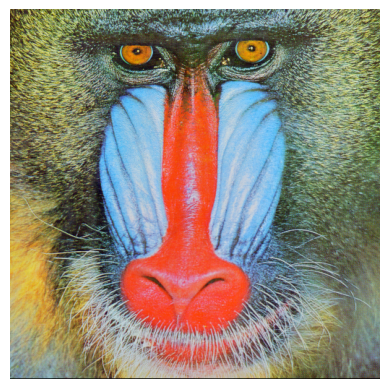

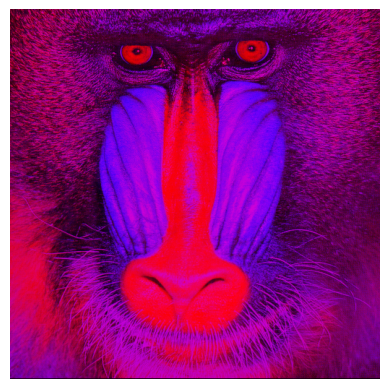

In [66]:
# abre a imagem baboon.png
baboon = cv2.imread('imgs/baboon.png')[:, :, ::-1]

# mostra a imagem com plt
mostrar(baboon)

# Remove o canal vermelho

baboon_sem_verde = baboon.copy()
baboon_sem_verde[:, :, 1] = 0

# salva a imagem sem o canal vermelho
cv2.imwrite('imgs_produzidas/baboon_sem_verde.png', baboon_sem_verde[:, :, ::-1])
new_baboon_sem_verde = cv2.imread('imgs_produzidas/baboon_sem_verde.png')[:, :, ::-1]
mostrar(new_baboon_sem_verde)



Aqui é curioso perceber como o babuíno ficou alterado pela transformação. Os pontos no nariz ficaram muito vermelhos enquanto os pontos ao lado do nariz (a partir de agora chamado de bochechas), estão muito azuis quase arroxeados. Isso aconteceu pois o verde presente em cada um deles tonava a imagem mais clara, com tons de branco. Na ausencia dele, os tons do nariz e bochecha ficaram muito mais constrastantes. Os tons que anteriormente eram brancos estão agora com tons de rosa / magenta, pois é a união de vermelho e azul

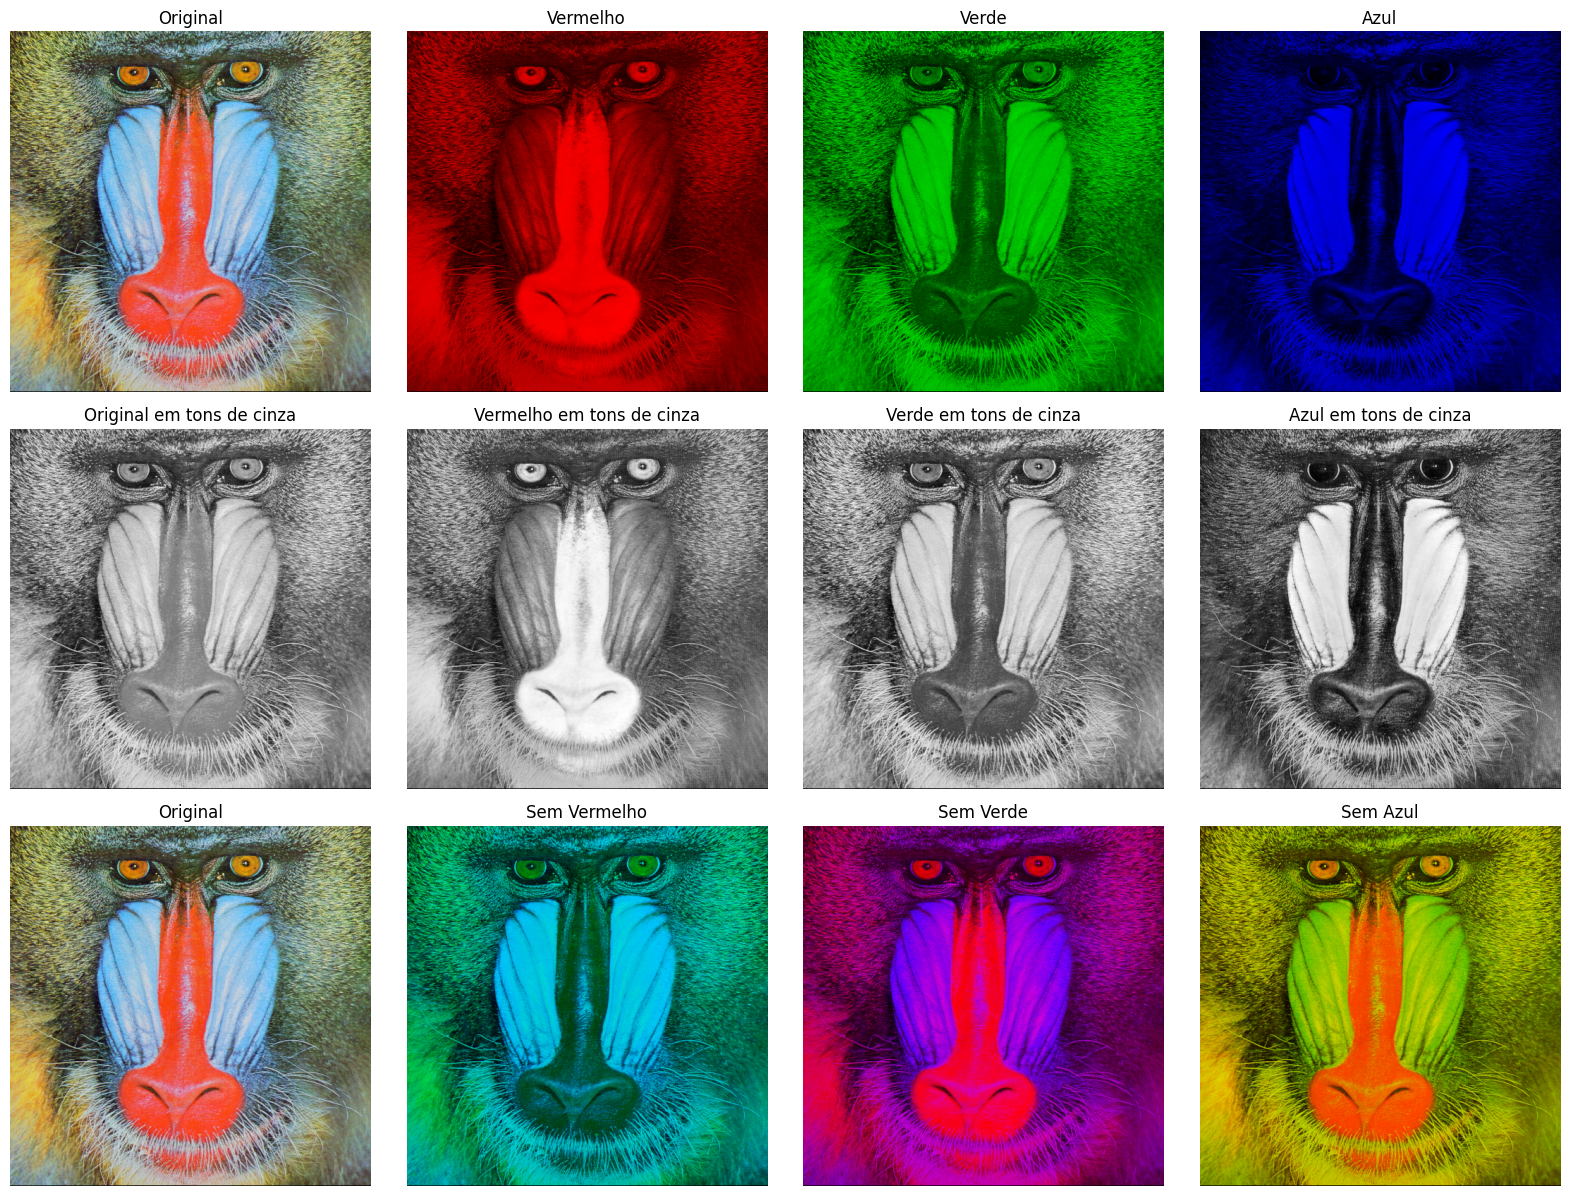

In [67]:
baboon_vermelho = baboon.copy()
baboon_vermelho[:, :, (1,2)] = 0
baboon_verde = baboon.copy()
baboon_verde[:, :, (0,2)] = 0
baboon_azul = baboon.copy()
baboon_azul[:, :, (0,1)] = 0

baboon_sem_vermelho = baboon.copy()
baboon_sem_vermelho[:, :, 0] = 0
baboon_sem_verde = baboon.copy()
baboon_sem_verde[:, :, 1] = 0
baboon_sem_azul = baboon.copy()
baboon_sem_azul[:, :, 2] = 0

imagens = []
imagens.append([baboon, baboon_vermelho, baboon_verde, baboon_azul])
# cria baboon em escala de cinza
baboon_gray = cv2.cvtColor(baboon, cv2.COLOR_RGB2GRAY)
imagens.append([baboon_gray, baboon_vermelho[:,:,0], baboon_verde[:,:,1], baboon_azul[:,:,2]])
imagens.append([baboon, baboon_sem_vermelho, baboon_sem_verde, baboon_sem_azul])

titulos = [['Original', 'Vermelho', 'Verde', 'Azul'], ['Original em tons de cinza', 'Vermelho em tons de cinza', 'Verde em tons de cinza', 'Azul em tons de cinza'], ['Original', 'Sem Vermelho', 'Sem Verde', 'Sem Azul']]
cmps = [[None, None, None, None], ['gray', 'gray', 'gray', 'gray'], [None, None, None, None]]
mostrar(imagens, titulos, cmps)



Agora que sabemos alterar e salvar uma imagem, vamos codificar a nossa entrada em binarios para poder esconder as informações nos pixels.

# Codificando

A forma mais simples de codificar a mensagem é apenas transformar os caracteres em números e posteriormente em sequência de binários. Para contemplar o maior número possível de caracteres, podemos utilizar ao invés do UTF-8, o Unicode nativo do python que utiliza 4 bytes: Para isso podemos fazer assim:

In [68]:
caracter = 'a'
print(f'O caracter {caracter} tem o valor {ord(caracter)} e pode ser expresso em binário de 4 bytes como {bin(ord(caracter))}')
caracter = 'A'
print(f'O caracter {caracter} tem o valor {ord(caracter)} e pode ser expresso em binário de 4 bytes como {bin(ord(caracter))}')
caracter = '!'
print(f'O caracter {caracter} tem o valor {ord(caracter)} e pode ser expresso em binário de 4 bytes como {bin(ord(caracter))}')
caracter = '#'
print(f'O caracter {caracter} tem o valor {ord(caracter)} e pode ser expresso em binário de 4 bytes como {bin(ord(caracter))}')
caracter = 'á'
print(f'O caracter {caracter} tem o valor {ord(caracter)} e pode ser expresso em binário de 4 bytes como {bin(ord(caracter))}')
caracter = 'Á'
print(f'O caracter {caracter} tem o valor {ord(caracter)} e pode ser expresso em binário de 4 bytes como {bin(ord(caracter))}')
caracter = '👍'
print(f'O caracter {caracter} tem o valor {ord(caracter)} e pode ser expresso em binário de 4 bytes como {bin(ord(caracter))} e em hexadecimal como {hex(ord(caracter))}')
caracter = '🇧🇷'
try :
    print(f'O caracter {caracter} tem o valor {ord(caracter)} e pode ser expresso em binário de 4 bytes como {bin(ord(caracter))}')
except Exception as e:
    print(f'Erro: o caracter {caracter} não pode ser convertido pois {e}')
print(f"O maior caracter disponível é {chr(0x10FFFF)}")
try:
    print(f"O maior caracter disponível é {chr(0x110000)}")
except Exception as e:
    print(f"Erro: o caracter chr(0x110000) não pode ser convertido pois {e}")

O caracter a tem o valor 97 e pode ser expresso em binário de 4 bytes como 0b1100001
O caracter A tem o valor 65 e pode ser expresso em binário de 4 bytes como 0b1000001
O caracter ! tem o valor 33 e pode ser expresso em binário de 4 bytes como 0b100001
O caracter # tem o valor 35 e pode ser expresso em binário de 4 bytes como 0b100011
O caracter á tem o valor 225 e pode ser expresso em binário de 4 bytes como 0b11100001
O caracter Á tem o valor 193 e pode ser expresso em binário de 4 bytes como 0b11000001
O caracter 👍 tem o valor 128077 e pode ser expresso em binário de 4 bytes como 0b11111010001001101 e em hexadecimal como 0x1f44d
Erro: o caracter 🇧🇷 não pode ser convertido pois ord() expected a character, but string of length 2 found
O maior caracter disponível é 􏿿
Erro: o caracter chr(0x110000) não pode ser convertido pois chr() arg not in range(0x110000)


Assim podemos verificar que precisamos de 3 bytes para representar qualquer caracter em unicode. Dessa forma podemos codificar os bits para uma mensagem simples: "Oi". ###### Explicacao do funcionamento

In [69]:
mensagem = "Oi"

# Cria um vetor numpy com capacidade para 3 * 8 * len(mensagem) bits
mensagem_binaria = np.zeros(3 * 8 * len(mensagem), dtype=bool)
print(f"O vetor mensagem_binaria tem {len(mensagem_binaria)} bits")
print(f"vetor antes da mensagem: {mensagem_binaria}")
# Converte a mensagem para binário
pos = 0
for c in mensagem:
    # Converte o caracter para binário
    c_bin = ord(c)
    mascara = 0x800000 # 1000 0000 0000 0000 0000 0000, coleta apenas o bit mais significativo
    for i in range(24):
        mensagem_binaria[pos] = (c_bin & mascara)>0
        c_bin = c_bin << 1
        pos += 1
print(f"vetor depois da mensagem: {mensagem_binaria}")

O vetor mensagem_binaria tem 48 bits
vetor antes da mensagem: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]
vetor depois da mensagem: [False False False False False False False False False False False False
 False False False False False  True False False  True  True  True  True
 False False False False False False False False False False False False
 False False False False False  True  True False  True False False  True]


Agora para garantir que a função funciona, precisamos extrarir a mensagem da codificacao: ##### Explicar como

In [70]:
mensagem_extraida = ""
for i in range(0, len(mensagem_binaria), 24):
    c_bin = 0
    for j in range(24):
        c_bin = c_bin << 1
        c_bin += mensagem_binaria[i+j]
    mensagem_extraida += chr(c_bin)
print(f"Mensagem extraída: {mensagem_extraida}")

Mensagem extraída: Oi


Assim conseguimos transformar uma mensagem em uma cadeia de caracteres numpy e uma cadeia de caracteres numpy em uma mensagem novamente. Para facilitar o trabalho futuro, será criado uma função para executar essas tarefas:

In [71]:
def codifica_mensagem(mensagem: str):
    # Cria um vetor numpy com capacidade para 3 * 8 * len(mensagem) bits
    mensagem_binaria = np.zeros(3 * 8 * len(mensagem), dtype=bool)
    pos = 0
    for c in mensagem:
        # Converte o caracter para binário
        c_bin = ord(c)
        mascara = 0x800000 # 1000 0000 0000 0000 0000 0000, coleta apenas o bit mais significativo
        for i in range(24):
            mensagem_binaria[pos] = (c_bin & mascara)>0
            c_bin = c_bin << 1
            pos += 1
    return mensagem_binaria

def decodifica_mensagem(mensagem_binaria):
    mensagem_extraida = ""
    for i in range(0, len(mensagem_binaria), 24):
        c_bin = 0
        for j in range(24):
            c_bin = c_bin << 1
            c_bin += mensagem_binaria[i+j]
        mensagem_extraida += chr(c_bin)
    return mensagem_extraida

Agora testamos essa função para garantir que toda informação passada é recebida

In [75]:
vetor = codifica_mensagem("Olá mundo! Eu estou aqui 😱😱😱 para ensinar 👨‍🏫 a falar coreano ( ͡° ͜ʖ ͡°): 소통할 수 있어요! ou chines: 我可以溝通！")
print(f"formato do vetor extraído: {vetor.shape}")
print(f"Mensagem extraída: {decodifica_mensagem(vetor)}")

formato do vetor extraído: (2472,)
Mensagem extraída: Olá mundo! Eu estou aqui 😱😱😱 para ensinar 👨‍🏫 a falar coreano ( ͡° ͜ʖ ͡°): 소통할 수 있어요! ou chines: 我可以溝通！


Agora, para modificar a imagem de forma a guardar os bits nela, será necessário alterar os canais de cores ao mesmo tempo. Uma boa forma de fazer isso é transformando a imagem (tridimensional) em unidimensional, depois somar e voltar para o formato inicial. #### Explicar

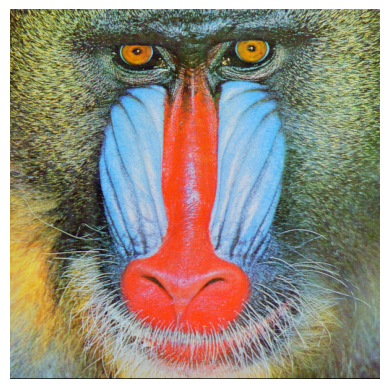

In [149]:
def insere_vetor(imagem: np.ndarray, vetor: np.ndarray):
    formato_inicial = imagem.shape
    imagem_flattened = imagem.flatten()
    imagem_flattened[:len(vetor)]>>=1
    imagem_flattened[:len(vetor)]<<=1 
    imagem_flattened[:len(vetor)] |= vetor
    return imagem_flattened.reshape(formato_inicial)

baboon_mensagem = insere_vetor(baboon, vetor)
tamanho_mensagem = len(vetor)
mostrar(baboon_mensagem)

Agora precisamos extrair a mensagem da imagem do baboom para garantir que a mensagem foi inserida corretamente:

In [152]:
def extrai_vetor(imagem: np.ndarray, tamanho: int):
    imagem_flattened = imagem.flatten()[:tamanho]
    imagem_flattened &= 1
    return imagem_flattened

vetor_escondido = extrai_vetor(baboon_mensagem, tamanho_mensagem)
print(f"Mensagem extraída: {decodifica_mensagem(vetor_escondido)}")

Mensagem extraída: Olá mundo! Eu estou aqui 😱😱😱 para ensinar 👨‍🏫 a falar coreano ( ͡° ͜ʖ ͡°): 소통할 수 있어요! ou chines: 我可以溝通！
